In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Seasonal ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
#STL decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm

In [2]:
df=pd.read_csv('GlobalTemperatures.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


    Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

    Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
    LandAverageTemperature: global average land temperature in celsius
    LandAverageTemperatureUncertainty: the 95% confidence interval around the average
    LandMaxTemperature: global average maximum land temperature in celsius
    LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
    LandMinTemperature: global average minimum land temperature in celsius
    LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
    LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
    LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

    The dt refers to years but the dtype is object. I need to transform it into datetime.

In [4]:
#
df['dt']=pd.to_datetime(df['dt'],format='%Y-%m-%d')

In [5]:
df.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object

# Data Cleaning

In [6]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [7]:
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [8]:
df_LT=df[['dt','LandAverageTemperature']]

In [9]:
df_LT

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [10]:
#check the missing values 
missing_values=df_LT.isnull().sum()
print(missing_values)

dt                         0
LandAverageTemperature    12
dtype: int64


In [11]:
df_LT_c=df_LT.dropna(axis=0)
df_LT_c.isnull().sum()

dt                        0
LandAverageTemperature    0
dtype: int64

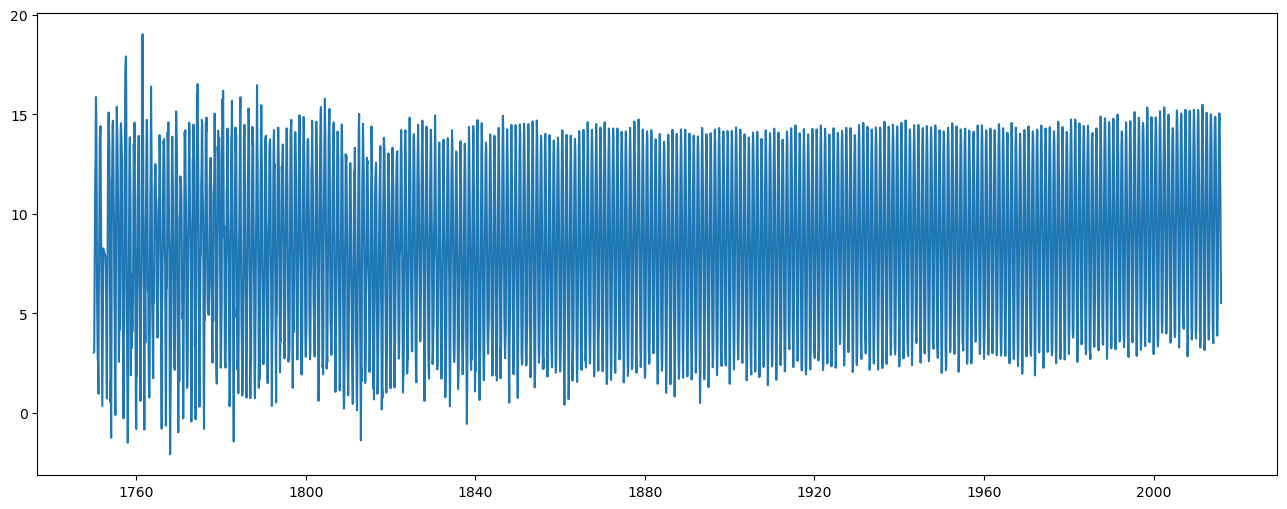

In [12]:
#Vidualization of the line char
plt.figure(figsize=(16,6))
plt.plot(df_LT_c['dt'],df_LT_c['LandAverageTemperature'])

Useless graph, becaue the temperature changed over different month. We need an average of each year

In [13]:
def generate_avg_temperature_by_year(df):
    data=df.copy()
    data['year']=data['dt'].dt.year
    
    #caculate the average landAveragetemperature by year
    df_avg=data.groupby('year')['LandAverageTemperature'].mean().reset_index()
    
    return df_avg

In [14]:
df_avg_year=generate_avg_temperature_by_year(df_LT_c)

In [15]:
df_avg_year

,year,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [16]:
#Plot specific period 
start_year=1900
end_year=2020

In [17]:
#define function
def plot_period_landtemperature_by_year(strat_year,end_year,df_i):
    df=generate_avg_temperature_by_year(df_i)
    data=df[(df['year']>=start_year)&(df['year']<=end_year)]
    plt.plot(data['year'],data['LandAverageTemperature'])
    plt.xlabel('Year')
    plt.ylabel('land Average Temperature over Year({}-{})'.format(start_year,end_year))
    plt.title('Land Temperature change over years {}-{}'.format(start_year,end_year))
    plt.show()

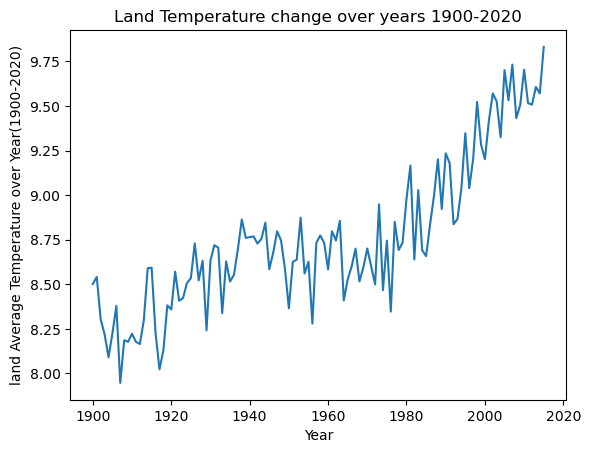

In [18]:
plot_period_landtemperature_by_year(start_year,end_year,df_LT_c)

We need to change this into streamlit(where user can choose the period) page after, that is why we need to write function to make it possible to fit different period of year.

In [19]:
#this can change month to 
df_LT_c['dt'].dt.strftime('%B')

0         January
1        February
2           March
3           April
4             May
          ...    
3187       August
3188    September
3189      October
3190     November
3191     December
Name: dt, Length: 3180, dtype: object

In [20]:
df_LT_c[df_LT_c['dt'].dt.year > 2000]

,dt,LandAverageTemperature
3012,2001-01-01,3.336
3013,2001-02-01,3.720
3014,2001-03-01,6.208
3015,2001-04-01,9.245
3016,2001-05-01,12.271
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [21]:
def plot_period_landtemperature_by_year(strat_year,end_year,month,df):
    data=df[(df['dt'].dt.year>=start_year)&(df['dt'].dt.year<=end_year)&(df['dt'].dt.strftime('%B')==month)]
    plt.plot(data['dt'].dt.year,data['LandAverageTemperature'])
    plt.xlabel('Year')
    plt.ylabel('land Average Temperature in month{} over Year({}-{})'.format(month,start_year,end_year))
    plt.title('Land Temperature in {} change over years {}-{}'.format(month,start_year,end_year))
    plt.show()

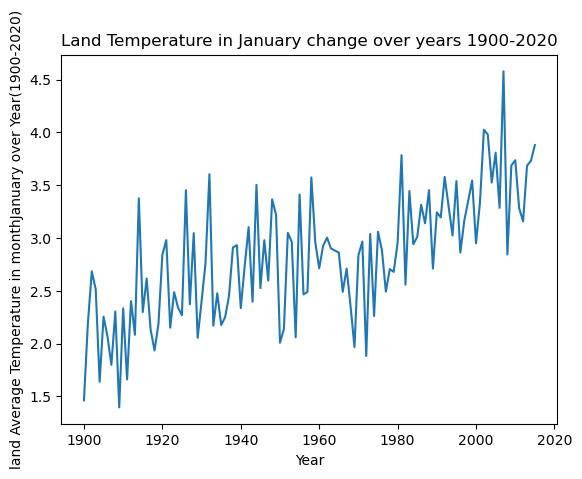

In [22]:
month='January'
plot_period_landtemperature_by_year(start_year,end_year,month,df_LT_c)

# Prediction model

## With split dataset to see the prediction difference

In [33]:
df_LT_c
#we can see there are index 

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [34]:
#set index as dt
dff=df_LT_c.copy()
dff.set_index('dt',inplace=True)

In [35]:
dff

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [107]:
#dff_monthly=dff.resample('M').mean()

In [44]:
#split bthe data into training and testing sets
train_data=dff.loc[:'2000-01-01']
test_data=dff.loc['2000-01-01':]

In [50]:
train_data

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
1999-09-01,12.723
1999-10-01,9.997
1999-11-01,6.592


In [51]:
test_data

,LandAverageTemperature
dt,
2000-01-01,2.950
2000-02-01,4.184
2000-03-01,6.219
2000-04-01,9.552
2000-05-01,11.874
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


### Fit Model

In [78]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Predict future temperatures
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
predictions

2989     3.783739
2990     5.845916
2991     9.018055
2992    11.874490
2993    14.046913
          ...    
3176    12.825524
3177    10.174137
3178     6.855092
3179     4.564129
3180     3.552912
Name: predicted_mean, Length: 192, dtype: float64

In [79]:
#we need totransform it into dataframe
df_pred=pd.DataFrame(predictions.values,index=test_data.index,columns=['Predicted'])

In [80]:
df_pred

,Predicted
dt,
2000-01-01,3.783739
2000-02-01,5.845916
2000-03-01,9.018055
2000-04-01,11.874490
2000-05-01,14.046913
...,...
2015-08-01,12.825524
2015-09-01,10.174137
2015-10-01,6.855092


In [81]:
forecast = pd.concat([test_data['LandAverageTemperature'], df_pred], axis=1)
forecast.columns = ['Original', 'Predicted']

In [82]:
forecast

,Original,Predicted
dt,,
2000-01-01,2.950,3.783739
2000-02-01,4.184,5.845916
2000-03-01,6.219,9.018055
2000-04-01,9.552,11.874490
2000-05-01,11.874,14.046913
...,...,...
2015-08-01,14.755,12.825524
2015-09-01,12.999,10.174137
2015-10-01,10.801,6.855092


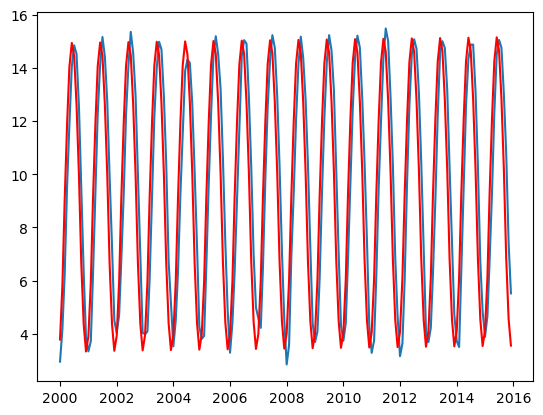

In [83]:
plt.plot(test_data,label='Original dataset')
plt.plot(df_pred,label='predicted',color='r')


In [84]:
forecast[forecast.index.month==6]

,Original,Predicted
dt,,
2000-06-01,14.060,14.937611
2001-06-01,14.110,14.954665
2002-06-01,14.084,14.968631
2003-06-01,14.017,14.982496
2004-06-01,13.889,14.996359
2005-06-01,14.476,15.010221
2006-06-01,14.443,15.024084
2007-06-01,14.309,15.037946
2008-06-01,14.145,15.051809


In [85]:
#test
test=forecast.copy()

In [86]:
test1=test[test.index.month==12]

In [87]:
test1

,Original,Predicted
dt,,
2000-12-01,3.863,3.332629
2001-12-01,4.507,3.358438
2002-12-01,4.038,3.372687
2003-12-01,5.133,3.386562
2004-12-01,4.257,3.400425
2005-12-01,4.878,3.414287
2006-12-01,4.987,3.428150
2007-12-01,4.523,3.442012
2008-12-01,4.385,3.455875


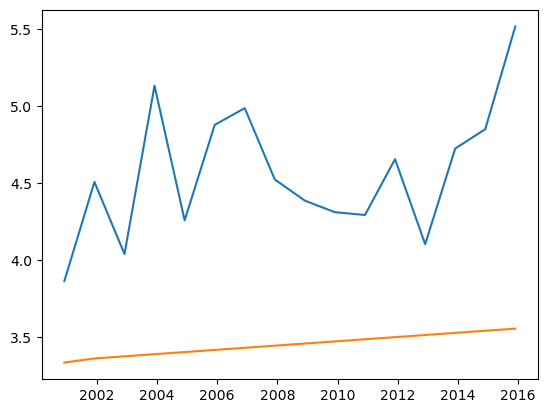

In [88]:
plt.plot(test1)

In [89]:
#the problemn is the temperature is not increasing in linear way
#while our prediction is always below
#So we will use seasonal_decompose

STL decomposition can help in understanding the underlying components of the time series and separating them for further analysis or modeling. It can be particularly useful when there is a strong seasonal or cyclic pattern in the data.

    Original: the original time series data without any decomposition. Contains the trend, seasonal,residual components.
    
    Trend: the long-term pattern or the underlying direction of thw time series.It shows the gradual increase or decrease in the data over an extended period, ignoring the shorter-term fluctuations and seasonality.
    
    Seasonal:captures the repetitive patterns or the fluctuations that occurs at fixed intervals, such as yearly, monthly
    
    Residual: The residual component, also known as the remainder or irregular component, contains the unexplained or random fluctuations that cannot be accounted for by the trend and seasonal components. It represents the noise or randomness in the data after removing the trend and seasonality.

* Additive Model: In an additive model, the seasonal component is considered as a constant pattern that is added to the trend component. This means that the seasonal fluctuations have a consistent magnitude regardless of the trend level. An additive model is appropriate when the seasonal variation remains constant throughout different levels of the trend.
\
* Multiplicative Model: In a multiplicative model, the seasonal component is treated as a proportion or percentage of the trend component. This means that the seasonal fluctuations grow or shrink in relation to the trend level. A multiplicative model is suitable when the seasonal variation changes in proportion to the trend level. For example, if the seasonal fluctuations become more pronounced as the trend increases.

In [90]:

def plot_stl(column,model):

    # Perform STL decomposition
    result = seasonal_decompose(column, model=model)

    # Access the seasonal, trend, and residual components
    seasonal = result.seasonal
    trend = result.trend
    residual = result.resid
    
    # Plot the components
    plt.subplot(4, 1, 1)
    plt.plot(column, label='Original')
    plt.legend()
    plt.title(f'With STL decompose in {model} way')

    plt.subplot(4, 1, 2)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [91]:
#compare original and predicted data
def plot_stl_p(column1,column2,model):

    # Perform STL decomposition
    result1 = seasonal_decompose(column1, model=model)
    result2= seasonal_decompose(column2,model=model)
    
    # Plot the components
    plt.subplot(4, 1, 1)
    plt.plot(column1, label='Original')
    plt.plot(column2,label='')
    plt.legend()
    plt.title(f'With STL decompose in {model} way')

    plt.subplot(4, 1, 2)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [92]:
model1='multiplicative'
model2='additive'

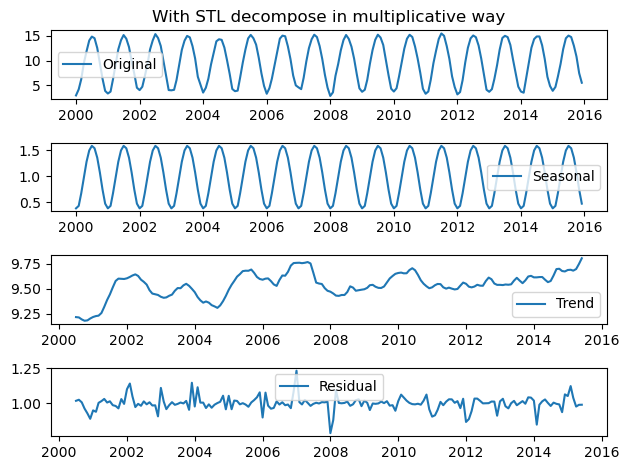

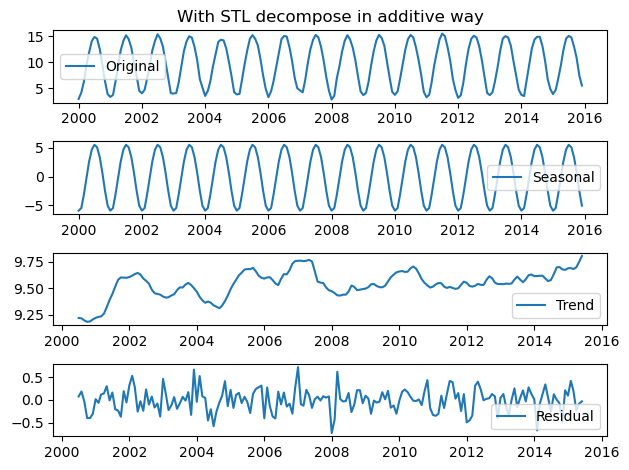

In [93]:
#test    this is based on the 
plot_stl(test_data['LandAverageTemperature'],model1)
plot_stl(test_data['LandAverageTemperature'],model2)

the original


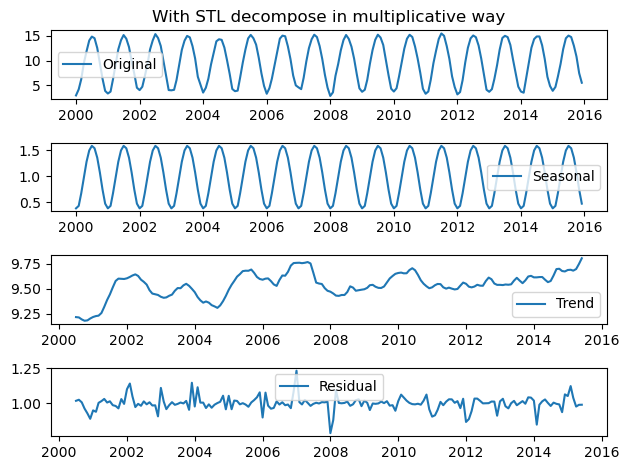

The predicted


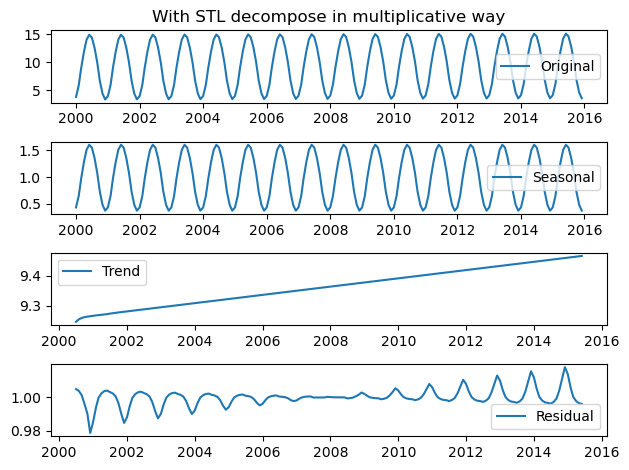

In [94]:
print('the original')
plot_stl(forecast['Original'],model1)
print('The predicted')
plot_stl(forecast['Predicted'],model1)

    As we can see our model has some problem in catching the trend residual. But still it can be used to pred

## Create model with all data and save the model for prediction

### create the model

In [95]:
model_y = SARIMAX(dff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_y = model_y.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Save the model

In [118]:
model_fit_y.save('sarimax_model_landtemperature.pkl')

### Test the model and try to make result readable

In [120]:
loaded_model=sm.load('sarimax_model_landtemperature.pkl')

In [139]:
pre_test = loaded_model.predict(start=len(dff), end= len(dff)+11)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [140]:
pre_test

3180     4.065509
3181     4.430140
3182     6.481539
3183     9.530207
3184    12.352286
3185    14.489495
3186    15.329951
3187    14.872623
3188    13.081181
3189    10.446557
3190     7.169342
3191     4.810947
Name: predicted_mean, dtype: float64

In [141]:
test_data.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', length=192, freq=None)

In [142]:
additional_index=pd.date_range(start=dff.index[-1]+pd.DateOffset(months=1),periods=len(pre_test),freq='MS')

In [143]:
additional_index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [144]:
df_prediction=pd.DataFrame(pre_test.values,index=additional_index,columns=['Predicted Temperature'])

In [145]:
df_prediction

,Predicted Temperature
2016-01-01,4.065509
2016-02-01,4.430140
2016-03-01,6.481539
2016-04-01,9.530207
2016-05-01,12.352286
2016-06-01,14.489495
2016-07-01,15.329951
2016-08-01,14.872623
2016-09-01,13.081181
2016-10-01,10.446557


### define function so we could use in general